In [1]:
!nvidia-smi

Fri Sep 26 04:12:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "nitrosocke/Ghibli-Diffusion"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "ghibli style magical princess with golden hair"
image = pipe(prompt).images[0]

image.save("./magical_princess.png")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

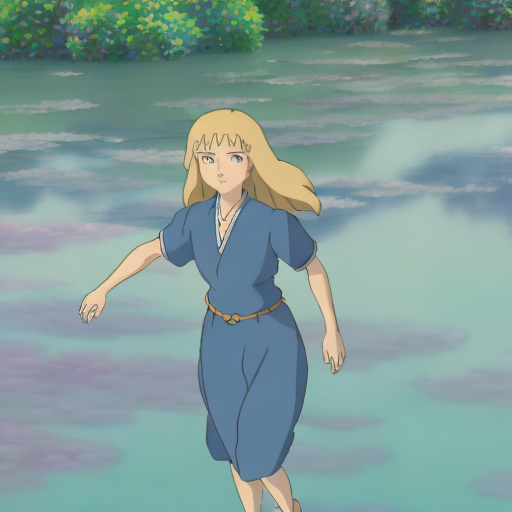

In [3]:
image

In [4]:
from diffusers import StableDiffusionImg2ImgPipeline, LMSDiscreteScheduler
#The LMSDiscreteScheduler helps manage the "timing" and "steps"during image generation to make sure the process is efficient and produces a high-quality result.
import torch
from PIL import Image
import gradio as gr
import numpy as np

In [5]:
def predict(scheduler, prompt, image, strength, guidance_scale):

    pipeline = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion")

    if scheduler == "LMS":
      lms = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)
      pipeline.scheduler = lms
      return pipeline(prompt=prompt, image=image.convert("RGB"), strength=strength, guidance_scale=guidance_scale).images[0]
    else:
      return pipeline(prompt=prompt, image=image.convert("RGB"), strength=strength, guidance_scale=guidance_scale).images[0]

In [ ]:
import gradio as gr

# Define the predict function
def predict(image):
    # Add the image processing logic here
    # For now, just return the input image as the output (for demonstration)
    return image

# Create the Gradio interface
gr.Interface(
    predict,  # The function to call when the interface is used
    inputs=gr.Image(type="pil"),  # Input: just an image
    outputs=gr.Image(),  # Output: generated image
    title="Simple Image-to-Image Generation",
).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://432092c3732c1759f7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
